In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import ResNet50V2

2025-04-26 10:59:46.497623: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745665186.520955     154 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745665186.528085     154 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Step 2: Load styles.csv
csv_path = "/kaggle/input/data-sheet/styles.csv"  

# Read CSV
df = pd.read_csv(csv_path, on_bad_lines='skip')

# Step 3: Create class names list
class_names = sorted(df['articleType'].dropna().unique())

# Print to verify
print(f"Total classes: {len(class_names)}")
print(class_names[:10])  

Total classes: 141
['Accessory Gift Set', 'Baby Dolls', 'Backpacks', 'Bangle', 'Basketballs', 'Bath Robe', 'Beauty Accessory', 'Belts', 'Blazers', 'Body Lotion']


In [3]:
# Step 4: Rebuild the model
num_classes = 142  # Manually set to 142 (not len(class_names))

base_model = ResNet50V2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

I0000 00:00:1745665189.785064     154 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [4]:
model_path = "/kaggle/input/restnet-model/keras/default/1/model.h5" 

In [5]:
model.load_weights(model_path)

In [6]:
# Step 6: Load model weights

if os.path.exists(model_path):
    print("Model weights file found!")
    model.load_weights(model_path)
    print("Model weights loaded successfully!")
else:
    print("Model file not found. Check the path.")

Model weights file found!
Model weights loaded successfully!


In [7]:
# Step 7: Define image loading function
def load_and_prep_image(filename, img_shape=224):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, size=[img_shape, img_shape])
    img = img / 255.0  # Normalize
    return img

# Step 8: Define prediction and plot function
def pred_and_plot(model, filename, class_names):
    img = load_and_prep_image(filename)
    img = tf.expand_dims(img, axis=0)  # Add batch dimension
    pred = model.predict(img)

    pred_index = np.argmax(pred)
    pred_class = class_names[pred_index]

    plt.imshow(img[0])
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)
    plt.show()

I0000 00:00:1745665197.680459     201 service.cc:148] XLA service 0x7a2b40003ea0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745665197.680495     201 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1745665198.257412     201 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


I0000 00:00:1745665200.718796     201 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


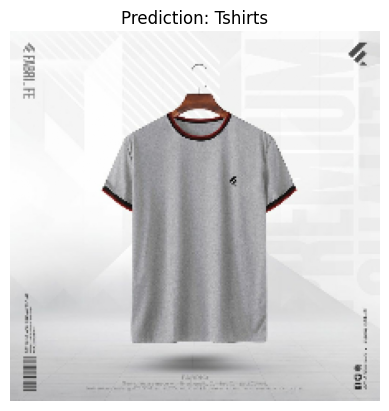

In [8]:
# Step 9: Predict your uploaded image
uploaded_image_path = "/kaggle/input/product-images/image-1.png"  

# Make prediction
pred_and_plot(model, uploaded_image_path, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


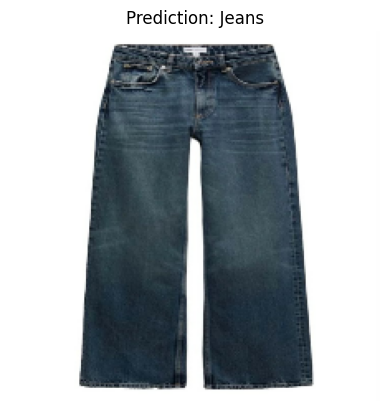

In [20]:
uploaded_image_path = "/kaggle/input/product-images/image-2.jpg"  

# Make prediction
pred_and_plot(model, uploaded_image_path, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


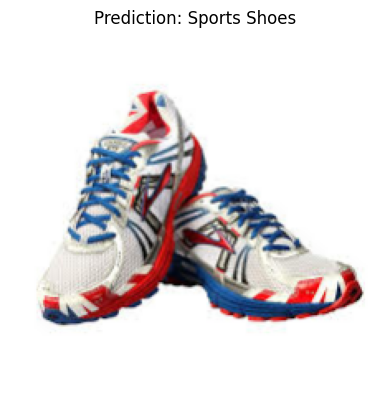

In [11]:
uploaded_image_path = "/kaggle/input/product-images/image-4.png"  

# Make prediction
pred_and_plot(model, uploaded_image_path, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


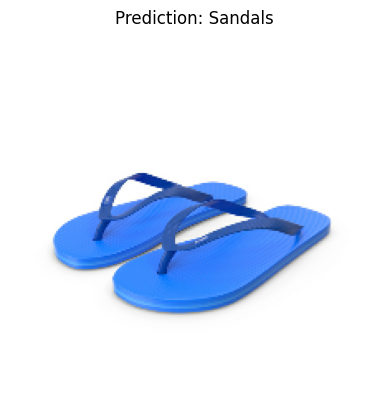

In [12]:
uploaded_image_path = "/kaggle/input/product-images/image-5.jpg"  

# Make prediction
pred_and_plot(model, uploaded_image_path, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


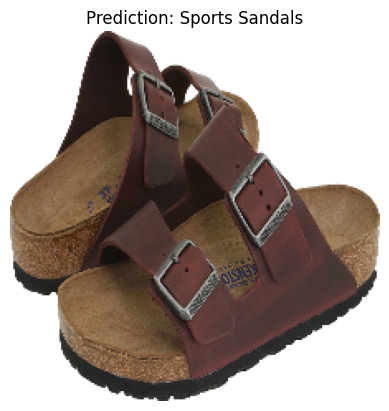

In [13]:
uploaded_image_path = "/kaggle/input/product-images/image-6.png"  

# Make prediction
pred_and_plot(model, uploaded_image_path, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


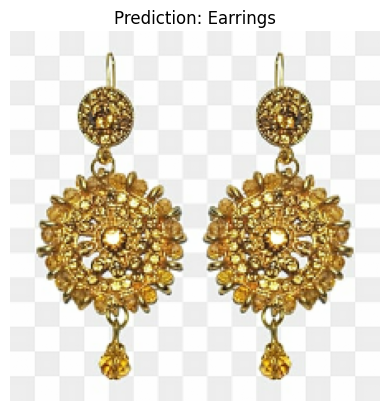

In [14]:
uploaded_image_path = "/kaggle/input/product-images/image-7.png"  

# Make prediction
pred_and_plot(model, uploaded_image_path, class_names)

In [22]:
# uploaded_image_path = "/kaggle/input/product-images/image-8.png"  

# # Make prediction
# pred_and_plot(model, uploaded_image_path, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


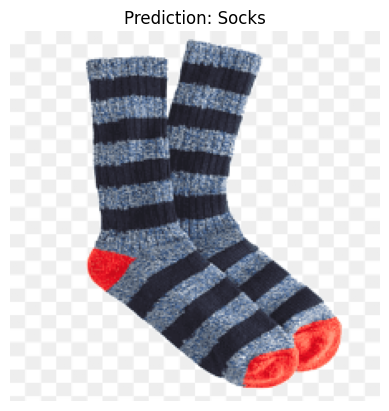

In [16]:
uploaded_image_path = "/kaggle/input/product-images/image-9.png"  

# Make prediction
pred_and_plot(model, uploaded_image_path, class_names)

In [ ]:
uploaded_image_path = "/kaggle/input/product-images/image-2.jpg"  

# Make prediction
pred_and_plot(model, uploaded_image_path, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


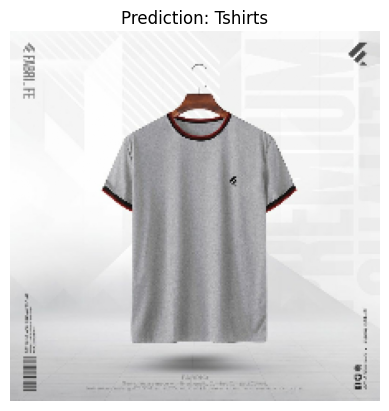

In [17]:
uploaded_image_path = "/kaggle/input/product-images/image-10.png"  

# Make prediction
pred_and_plot(model, uploaded_image_path, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


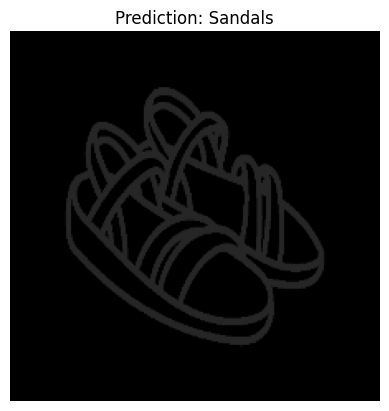

In [18]:
uploaded_image_path = "//kaggle/input/black-and-white/sandle.png"  

# Make prediction
pred_and_plot(model, uploaded_image_path, class_names)

In [23]:
# uploaded_image_path = "/kaggle/input/black-and-white/earing.png"  

# # Make prediction
# pred_and_plot(model, uploaded_image_path, class_names)